# Gradient Descent

### Import Pytorch

In [1]:
%matplotlib inline
from fastai.basics import *

### Create Observations (dataset)

In [2]:
n = 100

In [3]:
# Create rank 2 tensor (n rows by 2 columns)
x = torch.ones(n, 2)
x[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [4]:
# Fill the first column with uniform numbers from -1 to 1
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.2742,  1.0000],
        [ 0.0068,  1.0000],
        [-0.5339,  1.0000],
        [ 0.2604,  1.0000],
        [ 0.6850,  1.0000]])

### Create Weights

We will use matrix multiplication to add weights to each observation in the dataset. So since there are two columns (features) in the dataset we need 2 weights. If there were 50 columns (features) then we would need 50 weights, etc. The weights need to be stored in a rank 1 tensor (vector.)

We are using 3 and 2 as the values of our weights. When we implement SGD 3 and 2 are the values that the algorithm __should find on its own__

In [5]:
a = torch.tensor([3., 2]); a

tensor([3., 2.])

### Get y values for each observation

Here we are going to get y values for each observation. The slope of a line is:

`y = mx + b`

Using that definition `m` is our weight tensor (vector), `x` is the first column of our observations, and `b` is the second column of our observations. We will also use `torch.rand(n)` to add some random wiggle to our dataset.

In [6]:
y = x@a + torch.rand(n)

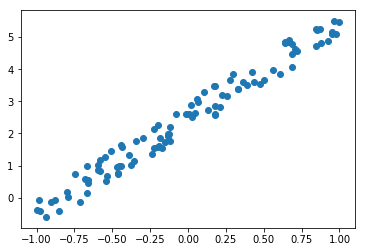

In [7]:
plt.scatter(x[:,0], y)

### Problem Statement

We want to find __parameters__ (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the __mean squared error__. 

### Define Loss Function (Mean Squared Error)

In [8]:
def mse(y_hat, y):
    # 1. Take the vector of predicted values - vector of actual values
    # 2. Square that result (so that all values are positive (don't want/can't have negatives)
    # 3. Find the mean/average value
    return ((y_hat - y)**2).mean()

### Create First Guess for Weights

In [9]:
# Guess of the weights (1, 1)
a = torch.tensor([-1.,1])

In [10]:
# Multiply our weight vector by the observation matrix to get our estimate (y_hat)
y_hat = x@a

In [11]:
# Calculate the mean squared error of our initial guess
mse(y_hat, y)

tensor(7.0525)

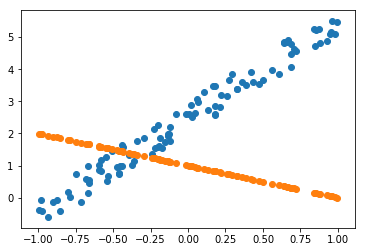

In [12]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

### Gradient Descent Algorithm

In [13]:
# Gather all variables that we need

y = y # Vector of actual values
x = x # Matrix of observations

# Vector of estimated weights (turned into a neural network parameter so that the gradients 
# are tracked and we can take the derivative.) Remember, we need to optimize/update these 
# weights so we'll need to figure out the gradient of the loss function in repsect to these values
a = nn.Parameter(a)
y_hat = y_hat # Vector of predicted values

In [14]:
def update():
    # NOTE: to turn this into stochastic gradient descent we would take a minibatch
    # indexes of our dataset (x[rand_index]) and the same corresponding indexes of 
    # our actual values (y[rand_index]) and calculate the loss on that mini-batch.
    # This way we don't have to calculate the loss on the ENTIRE dataset each time. 
    # ** This is mostly only a problem with large datasets. **
    
    # Get estimated values
    y_hat = x@a
    
    # Calculate the loss
    loss = mse(y_hat, y)
    if i % 10 == 0: print(loss)
    
    # Take the derivative of the loss function
    # This will compute the gradient/slope of all tensors that
    # contain the requires_grad=True flag (so in this case our one weight vector)
    # After loss.backward() is complete our weight vector (a) will have an
    # attribute .grad attached to it which will be tensors holding the gradient 
    # of the loss with respect to a (our weights)
    loss.backward()
    
    # Wrap the code that updates the weights in torch.no_grad() so that we aren't
    # tracking gradients while doing the update (we don't need to track them because
    # we won't need to take the derivative of them afterwards)
    with torch.no_grad():
        # Take the gradient x learning rate and update our weights by that amount
        amount_to_update = lr * a.grad
        a.sub_(amount_to_update)
        
        # Zero out the gradients after the update so that we can start from scratch 
        # during the next loop iteration.
        a.grad.zero_()

In [15]:
lr = 1e-1
for i in range(100):
    update()
    

tensor(7.0525, grad_fn=<MeanBackward1>)
tensor(1.4732, grad_fn=<MeanBackward1>)
tensor(0.4572, grad_fn=<MeanBackward1>)
tensor(0.1871, grad_fn=<MeanBackward1>)
tensor(0.1139, grad_fn=<MeanBackward1>)
tensor(0.0940, grad_fn=<MeanBackward1>)
tensor(0.0886, grad_fn=<MeanBackward1>)
tensor(0.0871, grad_fn=<MeanBackward1>)
tensor(0.0867, grad_fn=<MeanBackward1>)
tensor(0.0866, grad_fn=<MeanBackward1>)


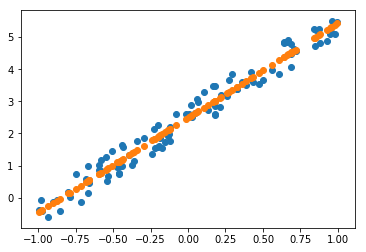

In [19]:
# Final y_hat (estimated values)
y_hat = x@a

# Plot the actual values vs. the estimated values
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)

### Visualization

In [20]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [21]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)